# Matplotlib e Pandas

O Pandas é uma biblioteca que permite a manipulação de dados de forma simples e eficiente. Ela é construída sobre o NumPy e permite a manipulação de dados de forma simples e eficiente. Quanto a gráficos, o Pandas utiliza o Matplotlib como base para a geração de gráficos.



## Base de dados utilizada

Para este notebook, utilizaremos a base de dados do top 10 IBOV de maio a agosto de 2023. A base de dados foi obtida no site do Yahoo Finance. O IBOV é o índice da Bovespa, que é a bolsa de valores brasileira. O IBOV é composto pelas ações mais negociadas na bolsa de valores brasileira. Para compor o IBOV, é feito um cálculo de ponderação das ações, onde as ações mais negociadas possuem maior peso no índice. O IBOV é um índice que é utilizado para medir o desempenho médio das cotações das ações mais negociadas na bolsa de valores brasileira.

Este material é didático e não tem como objetivo a recomendação de compra ou venda de ativos.

In [2]:
import pandas as pd

ARQUIVO_TOP_10_IBOV = 'top_10_ibov_mai_ago_2023.csv'

df_top_10_ibov = pd.read_csv(ARQUIVO_TOP_10_IBOV)
df_top_10_ibov['Date'] = pd.to_datetime(df_top_10_ibov['Date'], format='%Y-%m-%d')
df_top_10_ibov = df_top_10_ibov.set_index('Date', drop=True)
df_top_10_ibov.head()

,VALE3,ELET3,BBAS3,B3SA3,ABEV3,ITUB4,BBDC4,WEGE3,PETR3,RENT3
Date,,,,,,,,,,
2023-01-02,87.478874,40.327332,31.615412,12.039818,14.19,23.893169,13.879215,37.771538,22.264847,50.636215
2023-01-03,87.322311,39.572250,31.026070,11.636853,14.17,23.395597,13.190460,36.829731,21.950058,49.391312
2023-01-04,87.478874,40.635326,31.425303,11.725308,14.25,23.463890,13.228148,37.077576,22.315893,49.974247
2023-01-05,88.946640,40.714806,32.860638,12.088961,14.29,24.195612,13.802876,37.156883,23.039053,50.389210
2023-01-06,90.355698,40.734676,33.316906,12.373984,14.32,24.615131,14.189168,37.702141,22.894421,51.347595


In [3]:
df_top_10_ibov.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 123 entries, 2023-01-02 to 2023-06-29
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VALE3   123 non-null    float64
 1   ELET3   123 non-null    float64
 2   BBAS3   123 non-null    float64
 3   B3SA3   123 non-null    float64
 4   ABEV3   123 non-null    float64
 5   ITUB4   123 non-null    float64
 6   BBDC4   123 non-null    float64
 7   WEGE3   123 non-null    float64
 8   PETR3   123 non-null    float64
 9   RENT3   123 non-null    float64
dtypes: float64(10)
memory usage: 10.6 KB


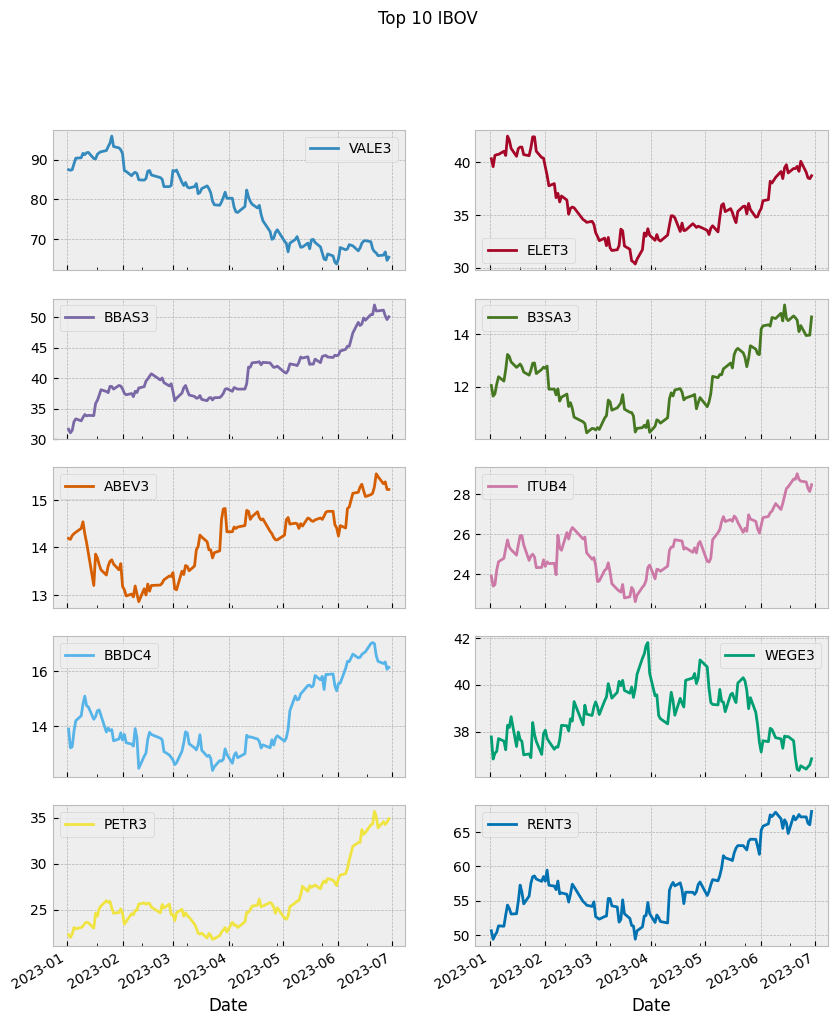

In [4]:
import matplotlib.pyplot as plt

plt.style.use('bmh')

df_top_10_ibov.plot(figsize=(10, 12), title='Top 10 IBOV', subplots=True, layout=(5, 2))
plt.show()

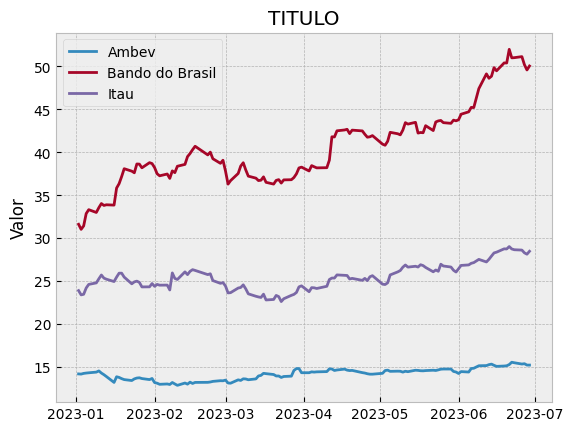

In [21]:
fig, ax = plt.subplots()

ax.plot(df_top_10_ibov.index, df_top_10_ibov['ABEV3'], label='Ambev');
ax.plot(df_top_10_ibov.index, df_top_10_ibov['BBAS3'], label='Bando do Brasil');
ax.plot(df_top_10_ibov.index, df_top_10_ibov['ITUB4'], label='Itau');

ax.set_title('TITULO')
ax.set_ylabel('Valor')

ax.legend()
plt.show()

O método `pct_change()` calcula a variação percentual entre o valor atual e o valor anterior. O valor anterior é o valor da linha anterior. O valor da primeira linha é `NaN` (Not a Number), pois não há valor anterior para calcular a variação percentual.

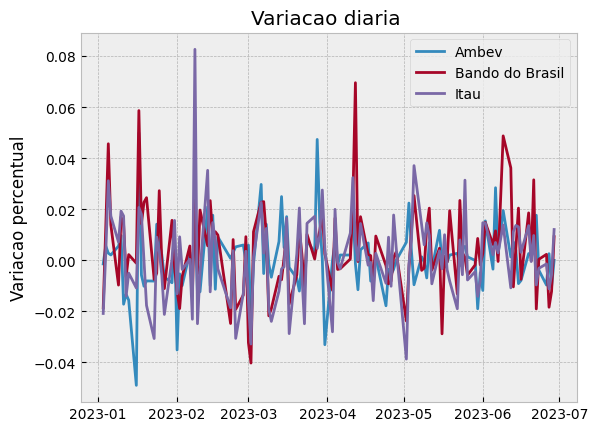

In [ ]:
fig, ax = plt.subplots()
variacao_diaria = df_top_10_ibov.pct_change()

ax.plot(variacao_diaria.index, variacao_diaria['ABEV3'], label='Ambev')
ax.plot(variacao_diaria.index, variacao_diaria['BBAS3'], label='Bando do Brasil')
ax.plot(variacao_diaria.index, variacao_diaria['ITUB4'], label='Itau')

ax.set_title('Variacao diaria')
ax.set_ylabel('Variacao percentual')

ax.legend()
plt.show()

Podemos chamar o ciclo de cores do Matplotlib para definir as cores dos gráficos.

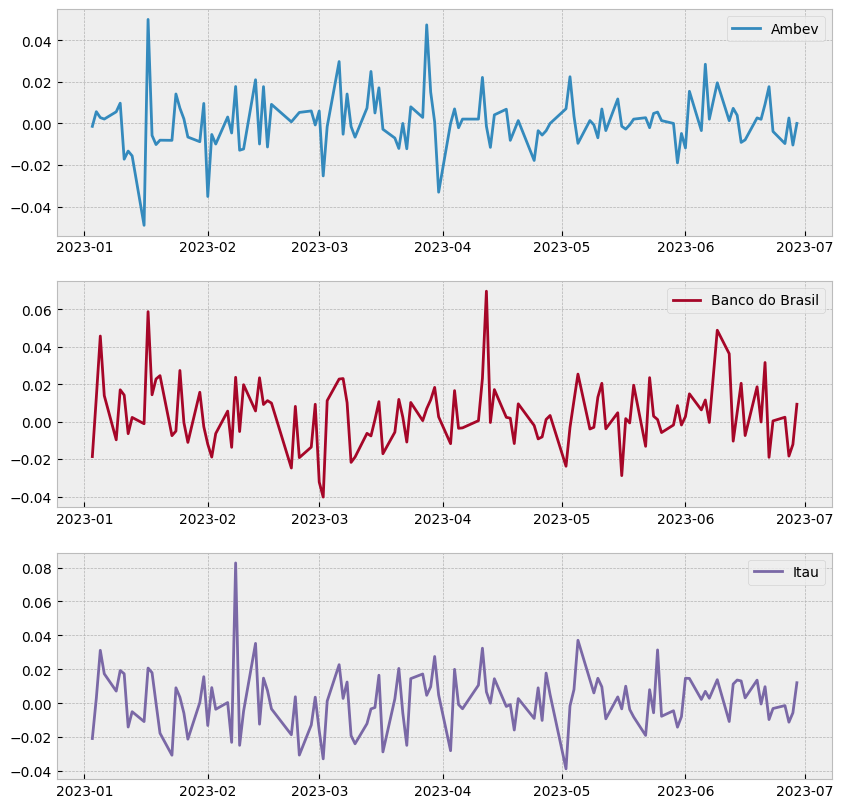

In [36]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))
variacao_diaria = df_top_10_ibov.pct_change()

axs[0].plot(variacao_diaria.index, variacao_diaria['ABEV3'], label='Ambev', color='C0')
axs[0].legend()

axs[1].plot(variacao_diaria.index, variacao_diaria['BBAS3'], label='Banco do Brasil', color='C1')
axs[1].legend()

axs[2].plot(variacao_diaria.index, variacao_diaria['ITUB4'], label='Itau', color='C2')
axs[2].legend()

#ax.set_title('Variacao diaria ')
#ax.set_ylabel('Variacao percentual')

#ax.legend()
plt.show()

[]

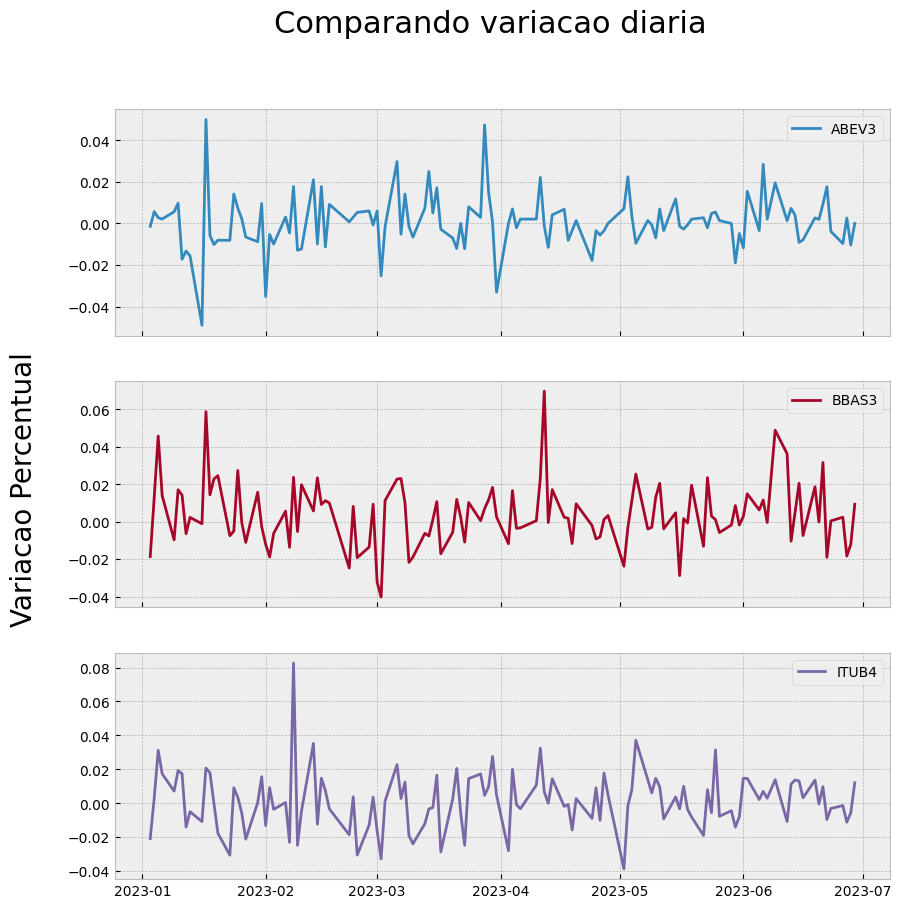

In [48]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 10), sharex=True)

variacao_diaria = df_top_10_ibov.pct_change()

bancos = ['ABEV3', 'BBAS3', 'ITUB4']

for i , banco in enumerate(bancos):
    axs[i].plot(variacao_diaria.index, variacao_diaria[banco], label = banco, color=f'C{i}')
    axs[i].legend()

fig.suptitle('Comparando variacao diaria', fontsize=22)
fig.supylabel('Variacao Percentual', fontsize=20)
plt.plot()
